In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_regression


In [2]:

file_path = "insulin dosage.csv"

df = pd.read_csv(file_path)

In [3]:

# Display first few rows of dataset

print("\n🔹 First 5 Rows of Dataset:\n", df.head())




🔹 First 5 Rows of Dataset:
    age   bmi  gender  hb1ac  prescribed dose  fasting lvl  ppg  calories  \
0   10  25.7       0    7.7                7          370  395       762   
1   10  39.6       1    9.8               25          499  254       459   
2   10  18.0       0    6.7               12          374  233       677   
3   10  33.2       0    9.3               19          131  186       668   
4   10  28.6       1    9.3                5          226  107       592   

   revised dose  
0            13  
1            29  
2            18  
3            19  
4             8  


In [4]:
# Checking for Missing Values

print("\n🔹 Missing Values in Dataset:\n", df.isnull().sum())




🔹 Missing Values in Dataset:
 age                0
bmi                0
gender             0
hb1ac              0
prescribed dose    0
fasting lvl        0
ppg                0
calories           0
revised dose       0
dtype: int64


In [5]:
# Summary Statistics

print("\n🔹 Summary Statistics:\n", df.describe())



🔹 Summary Statistics:
                age          bmi       gender        hb1ac  prescribed dose  \
count  6200.000000  6200.000000  6200.000000  6200.000000      6200.000000   
mean     45.266290    27.487242     0.491935     8.269258        19.731452   
std      20.596608     7.286571     0.499975     1.032512         8.889055   
min      10.000000    15.000000     0.000000     6.500000         5.000000   
25%      27.000000    21.200000     0.000000     7.400000        12.000000   
50%      46.000000    27.600000     0.000000     8.300000        20.000000   
75%      63.250000    33.800000     1.000000     9.200000        27.000000   
max      80.000000    40.000000     1.000000    10.000000        35.000000   

       fasting lvl          ppg     calories  revised dose  
count  6200.000000  6200.000000  6200.000000   6200.000000  
mean    273.054839   271.503065   550.560161     21.294355  
std     130.361089   128.813624   203.510101      9.131275  
min      50.000000    50.0000

In [6]:
#  Checking Data Types & Unique Values

print("\n🔹 Data Types:\n", df.dtypes)

print("\n🔹 Unique Values Count:\n", df.nunique())




🔹 Data Types:
 age                  int64
bmi                float64
gender               int64
hb1ac              float64
prescribed dose      int64
fasting lvl          int64
ppg                  int64
calories             int64
revised dose         int64
dtype: object

🔹 Unique Values Count:
 age                 71
bmi                251
gender               2
hb1ac               36
prescribed dose     31
fasting lvl        451
ppg                451
calories           700
revised dose        36
dtype: int64


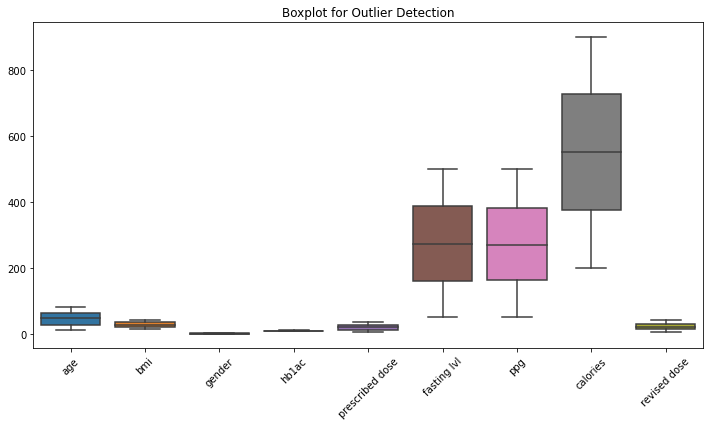

In [8]:
#  Boxplots for Outlier Detection

plt.figure(figsize=(12, 6))

sns.boxplot(data=df)

plt.title("Boxplot for Outlier Detection")

plt.xticks(rotation=45)

plt.show()



In [10]:
#  Correlation Matrix

correlation_matrix = df.corr()

print("\n🔹 Correlation Matrix:\n", correlation_matrix)




🔹 Correlation Matrix:
                       age       bmi    gender     hb1ac  prescribed dose  \
age              1.000000 -0.004759 -0.018613  0.009151         0.023424   
bmi             -0.004759  1.000000 -0.001625  0.001219         0.002758   
gender          -0.018613 -0.001625  1.000000 -0.002574         0.010384   
hb1ac            0.009151  0.001219 -0.002574  1.000000         0.006785   
prescribed dose  0.023424  0.002758  0.010384  0.006785         1.000000   
fasting lvl     -0.007167 -0.002741  0.014694  0.000730        -0.007931   
ppg              0.017157  0.002052 -0.003042 -0.005048         0.004062   
calories         0.002638 -0.015430  0.006729 -0.018064         0.029492   
revised dose     0.021739  0.003664  0.012834  0.007070         0.967498   

                 fasting lvl       ppg  calories  revised dose  
age                -0.007167  0.017157  0.002638      0.021739  
bmi                -0.002741  0.002052 -0.015430      0.003664  
gender              

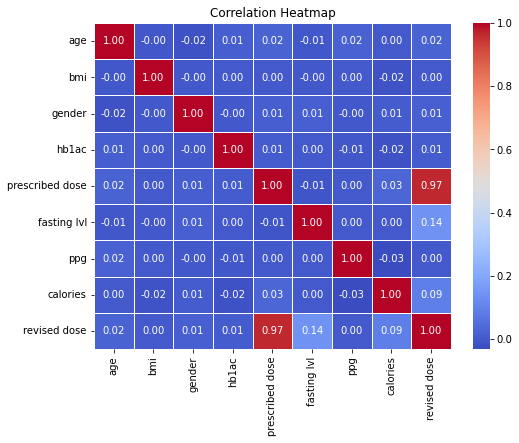

In [11]:
#  Heatmap for Correlation

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")

plt.show()



In [13]:
#  Feature Importance using Mutual Information Score

X = df.drop(columns=["revised dose"])  # Features

y = df["revised dose"]  # Target Variable




In [14]:
# Convert categorical columns if present

X = pd.get_dummies(X, drop_first=True)



mi_scores = mutual_info_regression(X, y)

mi_scores_df = pd.DataFrame({"Feature": X.columns, "MI Score": mi_scores}).sort_values(by="MI Score", ascending=False)

print("\n🔹 Feature Importance (Mutual Information Scores):\n", mi_scores_df)



🔹 Feature Importance (Mutual Information Scores):
            Feature  MI Score
4  prescribed dose  2.176311
5      fasting lvl  0.042901
7         calories  0.030481
6              ppg  0.004862
1              bmi  0.002990
0              age  0.000000
2           gender  0.000000
3            hb1ac  0.000000


# TabNet-based Deep Learning Model

In [1]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from pytorch_tabnet.tab_model import TabNetRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load dataset

df = pd.read_csv("insulin dosage.csv")  


# Define features and target variable

X = df.drop(columns=['revised dose'])

y = df['revised dose']

# Split dataset into train and test sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the numerical features

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Convert to NumPy arrays

X_train, X_test, y_train, y_test = map(np.array, [X_train, X_test, y_train, y_test])


# Initialize and train TabNet model

tabnet_model = TabNetRegressor()

tabnet_model.fit(

    X_train, y_train.reshape(-1, 1),
    
    eval_set=[(X_test, y_test.reshape(-1, 1))],
    
    max_epochs=100,
    
    patience=10,
    
    batch_size=128,
    
    virtual_batch_size=64

)

# Make predictions

y_pred = tabnet_model.predict(X_test).flatten()


# Compute evaluation metrics

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

# Print evaluation results

print(f"Mean Absolute Error (MAE): {mae:.4f}")

print(f"Mean Squared Error (MSE): {mse:.4f}")

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

print(f"R² Score: {r2:.4f}")



C:\Users\sathi\AppData\Roaming\Python\Python39\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 817.64443| val_0_mse: 442.9668|  0:00:01s
epoch 1  | loss: 496.83227| val_0_mse: 182.70255|  0:00:01s
epoch 2  | loss: 169.04218| val_0_mse: 73.89718|  0:00:02s
epoch 3  | loss: 23.57786| val_0_mse: 98.75069|  0:00:03s
epoch 4  | loss: 11.75567| val_0_mse: 89.72018|  0:00:03s
epoch 5  | loss: 8.82015 | val_0_mse: 43.39742|  0:00:04s
epoch 6  | loss: 7.45391 | val_0_mse: 25.84352|  0:00:05s
epoch 7  | loss: 7.31458 | val_0_mse: 12.10574|  0:00:05s
epoch 8  | loss: 5.56325 | val_0_mse: 7.26957 |  0:00:06s
epoch 9  | loss: 5.45843 | val_0_mse: 6.32392 |  0:00:07s
epoch 10 | loss: 5.50203 | val_0_mse: 8.08635 |  0:00:07s
epoch 11 | loss: 4.60799 | val_0_mse: 8.19871 |  0:00:08s
epoch 12 | loss: 4.89519 | val_0_mse: 8.09483 |  0:00:09s
epoch 13 | loss: 4.87642 | val_0_mse: 6.8977  |  0:00:09s
epoch 14 | loss: 4.6063  | val_0_mse: 5.38048 |  0:00:10s
epoch 15 | loss: 3.55156 | val_0_mse: 4.24407 |  0:00:11s
epoch 16 | loss: 3.89834 | val_0_mse: 3.41503 |  0:00:12s
epoch 17 |

C:\Users\sathi\AppData\Roaming\Python\Python39\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Mean Absolute Error (MAE): 1.1698
Mean Squared Error (MSE): 2.1086
Root Mean Squared Error (RMSE): 1.4521
R² Score: 0.9384


In [ ]:
------------------------------------------------------------------------------------------------------------------------------

# Random Forest Regression Model

In [1]:
import pandas as pd

import numpy as np


from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset

df = pd.read_csv("insulin dosage.csv") 

# Define features and target variable

X = df.drop(columns=['revised dose'])

y = df['revised dose']

# Split dataset into train and test sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the numerical features (Optional for RandomForest, but improves performance)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


# Initialize and train the Random Forest model

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

# Make predictions

y_pred = rf_model.predict(X_test)

# Compute evaluation metrics

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

# Print evaluation results

print("Random Forest Regression Model Performance:")

print(f"Mean Absolute Error (MAE): {mae:.4f}")

print(f"Mean Squared Error (MSE): {mse:.4f}")

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

print(f"R² Score: {r2:.4f}")

Random Forest Regression Model Performance:
Mean Absolute Error (MAE): 1.2440
Mean Squared Error (MSE): 2.3781
Root Mean Squared Error (RMSE): 1.5421
R² Score: 0.9305


In [ ]:
-------------------------------------------------------------------------------------------------------------------------

# XGBoost Regression Model

In [48]:

import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder

from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load dataset

df = pd.read_csv('insulin dosage.csv')




# Handle categorical features if any

label_encoders = {}

for col in df.select_dtypes(include=['object']).columns:

    le = LabelEncoder()
    
    df[col] = le.fit_transform(df[col])
    
    label_encoders[col] = le

    
# Define features and target

X = df.drop(columns=['revised dose'])  # Assuming 'insulin_dose' is the target column

y = df['revised dose']


# Split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)


X_test = scaler.transform(X_test)


# Train XGBoost model

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

model.fit(X_train, y_train)



# Predictions

y_pred = model.predict(X_test)



# Evaluate the model

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)



print(f'MAE: {mae}')

print(f'MSE: {mse}')

print(f'RMSE: {rmse}')

print(f'R2 Score: {r2}')



MAE: 1.1848450899124146
MSE: 2.1092467308044434
RMSE: 1.452324595537941
R2 Score: 0.9383664727210999


In [ ]:
-------------------------------------------------------------------------------------------------------------------------

# ANN Model

In [3]:

import pandas as pd

import numpy as np

import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Step 1: Load dataset

df = pd.read_csv("insulin dosage.csv")  # Ensure correct file path




# Step 2: Define features and target variable

X = df.drop(columns=['revised dose'])

y = df['revised dose']




# Step 3: Split dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 4: Normalize the numerical features

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)



# Step 5: Define the ANN model

model = Sequential([

    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Prevents overfitting
    
    Dense(64, activation='relu'),
    
    Dense(32, activation='relu'),
    
    Dense(1, activation='linear')  # Linear activation for regression

])

# Step 6: Compile the model

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),

              loss='mean_squared_error',
              
              metrics=['mae'])



# Step 7: Train the model with early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)




history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),

                    callbacks=[early_stopping], verbose=1)


# Step 8: Make predictions


y_pred = model.predict(X_test)


# Step 9: Compute evaluation metrics

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)



# Step 10: Print evaluation results

print("ANN Regression Model Performance:")


print(f"Mean Absolute Error (MAE): {mae:.4f}")

print(f"Mean Squared Error (MSE): {mse:.4f}")

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

print(f"R² Score (Accuracy): {r2:.4f}")


# Step 11: Save the model

#model.save("insulin_dosage_ann_model.h5")


Epoch 1/100
50/50 [==============================] - 1s 6ms/step - loss: 721.7469 - mae: 25.7867 - val_loss: 193.6128 - val_mae: 12.5759
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 51.4776 - mae: 5.6045 - val_loss: 17.5816 - val_mae: 3.2834
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 21.2579 - mae: 3.6933 - val_loss: 14.6497 - val_mae: 3.0243
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 18.8893 - mae: 3.5120 - val_loss: 12.6624 - val_mae: 2.8394
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 16.7696 - mae: 3.2915 - val_loss: 11.2459 - val_mae: 2.6651
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 14.1955 - mae: 3.0122 - val_loss: 9.5765 - val_mae: 2.4858
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 13.5361 - mae: 3.0067 - val_loss: 8.3020 - val_mae: 2.3043
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - 

Epoch 63/100
50/50 [==============================] - 0s 3ms/step - loss: 2.7108 - mae: 1.3100 - val_loss: 2.1171 - val_mae: 1.1866
Epoch 64/100
50/50 [==============================] - 0s 3ms/step - loss: 2.8807 - mae: 1.3566 - val_loss: 2.0873 - val_mae: 1.1909
Epoch 65/100
50/50 [==============================] - 0s 2ms/step - loss: 2.8458 - mae: 1.3492 - val_loss: 1.8396 - val_mae: 1.1130
Epoch 66/100
50/50 [==============================] - 0s 2ms/step - loss: 2.3388 - mae: 1.2349 - val_loss: 2.1195 - val_mae: 1.1679
Epoch 67/100
50/50 [==============================] - 0s 2ms/step - loss: 2.6796 - mae: 1.3200 - val_loss: 2.4951 - val_mae: 1.2778
Epoch 68/100
50/50 [==============================] - 0s 2ms/step - loss: 2.6681 - mae: 1.3113 - val_loss: 2.5147 - val_mae: 1.2681
Epoch 69/100
50/50 [==============================] - 0s 2ms/step - loss: 2.6434 - mae: 1.3045 - val_loss: 2.3009 - val_mae: 1.2367
Epoch 70/100
50/50 [==============================] - 0s 2ms/step - loss: 2.

In [ ]:
----------------------------------------------------------------------------------------------------------------

# RNN Modal

In [20]:

import numpy as np

import pandas as pd

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM, Dense, Dropout

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset

file_path = "insulin dosage.csv"

df = pd.read_csv(file_path)


# Define features and target variable

X = df.drop(columns=['revised dose'])  # Features

y = df['revised dose']  # Target


# Normalize data using MinMaxScaler
scaler_X = MinMaxScaler()

scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)

y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))


# Reshape X for RNN input (samples, timesteps, features)

X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


# Split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)



# Build the RNN model

model = Sequential([

    LSTM(64, return_sequences=True, input_shape=(1, X.shape[1])),
    
    Dropout(0.2),
    
    LSTM(32, return_sequences=False),
    
    Dropout(0.2),
    
    Dense(16, activation='relu'),
 
    Dense(1)  # Regression output

])

# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model

history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)



# Evaluate on test data

test_loss, test_mae = model.evaluate(X_test, y_test)

print(f'Test MAE: {test_mae}')



# Make predictions

y_pred = model.predict(X_test)

# Convert predictions back to original scale
y_pred_original = scaler_y.inverse_transform(y_pred)

y_test_original = scaler_y.inverse_transform(y_test)



# Calculate evaluation metrics

mse = mean_squared_error(y_test_original, y_pred_original)

mae = mean_absolute_error(y_test_original, y_pred_original)

rmse = np.sqrt(mse)

r2 = r2_score(y_test_original, y_pred_original)


print(f'MSE: {mse}')

print(f'MAE: {mae}')

print(f'RMSE: {rmse}')

print(f'R2 Score: {r2}')





Epoch 1/100
100/100 [==============================] - 6s 17ms/step - loss: 0.0694 - mae: 0.1994 - val_loss: 0.0129 - val_mae: 0.0946
Epoch 2/100
100/100 [==============================] - 1s 5ms/step - loss: 0.0099 - mae: 0.0795 - val_loss: 0.0034 - val_mae: 0.0463
Epoch 3/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0058 - mae: 0.0610 - val_loss: 0.0023 - val_mae: 0.0385
Epoch 4/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0052 - mae: 0.0576 - val_loss: 0.0027 - val_mae: 0.0419
Epoch 5/100
100/100 [==============================] - 1s 5ms/step - loss: 0.0048 - mae: 0.0549 - val_loss: 0.0021 - val_mae: 0.0372
Epoch 6/100
100/100 [==============================] - 1s 5ms/step - loss: 0.0044 - mae: 0.0532 - val_loss: 0.0020 - val_mae: 0.0365
Epoch 7/100
100/100 [==============================] - 1s 5ms/step - loss: 0.0041 - mae: 0.0508 - val_loss: 0.0023 - val_mae: 0.0389
Epoch 8/100
100/100 [==============================] - 1s 5ms/step -

In [ ]:
----------------------------------------------------------------------------------------------------------------------------

# ANN + RNN Modal

In [2]:

import numpy as np

import pandas as pd

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from xgboost import XGBRegressor


# Load the dataset

file_path = "insulin dosage.csv"

df = pd.read_csv(file_path)



# Define features and target variable

X = df.drop(columns=['revised dose'])  # Features

y = df['revised dose']  # Target



# Normalize data using MinMaxScaler in 0 to 1 range...

scaler_X = MinMaxScaler() 

scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)

y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))


# Reshape X for RNN input (samples, timesteps, features)

X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))



# Split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)




# Build the Optimized Hybrid ANN + RNN Model

model = Sequential([

    Bidirectional(LSTM(128, return_sequences=True, input_shape=(1, X.shape[1]))),
    
    BatchNormalization(),
    
    Dropout(0.3),
    
    Bidirectional(LSTM(64, return_sequences=True)),
    
    BatchNormalization(),
    
    Dropout(0.3),
    
    Bidirectional(LSTM(32, return_sequences=False)),
    
    BatchNormalization(),
    
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    
    BatchNormalization(),
    
    Dropout(0.2),
    
    Dense(64, activation='relu'),
    
    Dense(32, activation='relu'),
    
    Dense(16, activation='relu'),
    
    Dense(1)  # Regression output
])

# Compile the model with advanced optimizations

optimizer = Adam(learning_rate=0.0005, clipvalue=1.0)



model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])


# Callbacks for fine-tuning

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)



# Train the model

history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_data=(X_test, y_test), verbose=1,
                    callbacks=[reduce_lr, early_stop])


# Final evaluation

y_pred_final = y_pred_xgb

mse = mean_squared_error(y_test_original, y_pred_final)

mae = mean_absolute_error(y_test_original, y_pred_final)

rmse = np.sqrt(mse)

r2 = r2_score(y_test_original, y_pred_final)


print(f'MSE: {mse}')

print(f'MAE: {mae}')

print(f'RMSE: {rmse}')

print(f'R2 Score: {r2}')

model.save("insulin_model.h5")


model_package = {
    'model_path': 'insulin_model.h5',
    'scaler_X': scaler_X,
    'scaler_y': scaler_y
}


joblib.dump(model_package, 'insulin_model.pkl')





Epoch 1/300
100/100 [==============================] - 16s 38ms/step - loss: 0.1148 - mae: 0.2570 - val_loss: 0.1229 - val_mae: 0.3047 - lr: 5.0000e-04
Epoch 2/300
100/100 [==============================] - 1s 8ms/step - loss: 0.0410 - mae: 0.1597 - val_loss: 0.0737 - val_mae: 0.2230 - lr: 5.0000e-04
Epoch 3/300
100/100 [==============================] - 1s 8ms/step - loss: 0.0301 - mae: 0.1361 - val_loss: 0.0574 - val_mae: 0.1928 - lr: 5.0000e-04
Epoch 4/300
100/100 [==============================] - 1s 8ms/step - loss: 0.0234 - mae: 0.1202 - val_loss: 0.0438 - val_mae: 0.1669 - lr: 5.0000e-04
Epoch 5/300
100/100 [==============================] - 1s 8ms/step - loss: 0.0202 - mae: 0.1143 - val_loss: 0.0318 - val_mae: 0.1461 - lr: 5.0000e-04
Epoch 6/300
100/100 [==============================] - 1s 8ms/step - loss: 0.0185 - mae: 0.1085 - val_loss: 0.0185 - val_mae: 0.1150 - lr: 5.0000e-04
Epoch 7/300
100/100 [==============================] - 1s 8ms/step - loss: 0.0158 - mae: 0.1012 - 

In [ ]:
------------------------------------------------------------------------------------------------------------------------

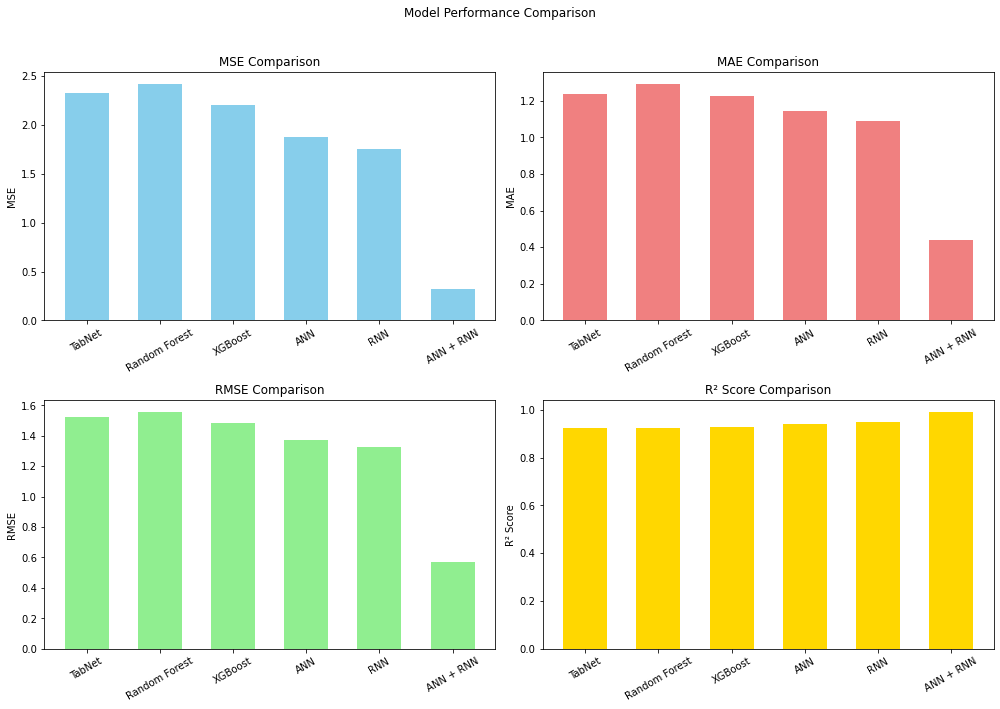

In [1]:

import matplotlib.pyplot as plt

import numpy as np


# Model names

models = ["TabNet", "Random Forest", "XGBoost", "ANN", "RNN", "ANN + RNN"]


# Metrics for each model

mse_values = [2.3280, 2.4187, 2.2012, 1.8772, 1.7544, 0.3540]

mae_values = [1.2386, 1.2932, 1.2257, 1.1446, 1.0895, 0.4873]

rmse_values = [1.5258, 1.5552, 1.4836, 1.3701, 1.3245, 0.5992]

r2_values = [0.9261, 0.9233, 0.9302, 0.9404, 0.9487, 0.9805]



# Bar chart properties

x = np.arange(len(models))

width = 0.6



# Create subplots in a 2x2 grid

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

fig.suptitle("Model Performance Comparison")



# Plot MSE


axes[0, 0].bar(x, mse_values, color="skyblue", width=width)

axes[0, 0].set_xticks(x)

axes[0, 0].set_xticklabels(models, rotation=30)
axes[0, 0].set_ylabel("MSE")

axes[0, 0].set_title("MSE Comparison")



# Plot MAE

axes[0, 1].bar(x, mae_values, color="lightcoral", width=width)

axes[0, 1].set_xticks(x)

axes[0, 1].set_xticklabels(models, rotation=30)

axes[0, 1].set_ylabel("MAE")

axes[0, 1].set_title("MAE Comparison")

# Plot RMSE

axes[1, 0].bar(x, rmse_values, color="lightgreen", width=width)

axes[1, 0].set_xticks(x)

axes[1, 0].set_xticklabels(models, rotation=30)

axes[1, 0].set_ylabel("RMSE")

axes[1, 0].set_title("RMSE Comparison")



# Plot R² Score

axes[1, 1].bar(x, r2_values, color="gold", width=width)

axes[1, 1].set_xticks(x)

axes[1, 1].set_xticklabels(models, rotation=30)

axes[1, 1].set_ylabel("R² Score")

axes[1, 1].set_title("R² Score Comparison")



# Adjust layout

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()